## Binary classification on Breast Cancer Wisconsin (diagnostic) dataset by Decision Tree, KNN, SVM, ANN, and Boosting

### load helper functions from modules

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV
import pylab as pl
import time
from sklearn.cross_validation import cross_val_score
from sklearn.learning_curve import learning_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


### import five classifiers

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
print("sklearn version:",sk.__version__)
print("numpy version:",np.__version__)
print("matplotlib version:",matplotlib.__version__)
print("pandas version:",pd.__version__)

sklearn version: 0.19.0
numpy version: 1.13.1
matplotlib version: 2.0.2
pandas version: 0.20.3


### load breast cancer 

In [4]:
bc = pd.read_csv("breast_cancer.csv")

### quick look on data

In [5]:
print("data shapes: ", bc.shape)

data shapes:  (569, 33)


In [6]:
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
bc.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### In this dataset, diagnosis is class column. id column is not related to diagnosis, and Unnamed: 32 column is all NaNs. So I will drop these two columns. 

In [8]:
bc = bc.drop(['id',"Unnamed: 32"],axis=1)

### split features and labels

In [9]:
features, labels= bc.drop(["diagnosis"],axis=1),bc.diagnosis

### let's see the numbers of each labels and number of features

In [10]:
print(labels.value_counts())
print()
print("Number of features:",features.shape[1])

B    357
M    212
Name: diagnosis, dtype: int64

Number of features: 30


### data is a little unbalanced. But let's see what we can get if we run all default classifiers on the raw data

### since a bit unbalanced, I randomly split train and test data with stratification. And also we'd better map string labels to numbers. 80% of data are used as trainning set, and 20% as test set.

In [11]:
label_map = {"B":0,"M":1}
labels=labels.map(label_map)
labels.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [12]:
strat_shuffle_split = StratifiedShuffleSplit(labels, test_size=0.2, random_state=88)

for train_index, test_index in strat_shuffle_split:
    X_train, X_test = features.values[train_index], features.values[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]

### verify the shape of data after stratifiedshufflesplit

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((455, 30), (455,), (114, 30), (114,))

### Let's create classifier instances
### Since SVM, Neural Network, Decision Tree have some randomness giving variation on analysis, I added random_state attribute to present consistent results

In [14]:
classifiers = [
    KNeighborsClassifier(), #KNN
    SVC(random_state=66),#SVM
    MLPClassifier(solver="sgd",random_state=10),#ANN
    DecisionTreeClassifier(criterion="entropy",random_state=66),# Default Entropy Decision Tree
    AdaBoostClassifier(random_state=88),#Boosting
    ]

### Using default classifiers trained on whole train set, and get train and test accuracy and running time for training and prediction. I run ten times and get average of all performances

In [15]:
log_cols=["Classifier", "Train_Accuracy","Test_Accuracy", "Training_time", "Prediction_time_on_test"]
starting_performance = pd.DataFrame(columns = log_cols)
repeat = 10

for clf in classifiers:
    name = clf.__class__.__name__
    print("="*30)
    print(name)

    train_acc = []
    test_acc = []
    training_time = []
    prediction_time_on_test  = []
    
    for _ in range(repeat):
        
        start1 = time.time()
        clf.fit(X_train, y_train)
        training_time.append(time.time() - start1)
        
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        start2 = time.time()
        test_predictions = clf.predict(X_test)
        prediction_time_on_test.append(time.time() - start2)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time), np.mean(prediction_time_on_test)]], columns=log_cols)
    starting_performance = starting_performance.append(log_entry)
starting_performance = starting_performance.reset_index(drop=True)
print("="*30)

KNeighborsClassifier
SVC
MLPClassifier
DecisionTreeClassifier
AdaBoostClassifier


### Let's see the starting performances of each classifiers

In [16]:
starting_performance

,Classifier,Train_Accuracy,Test_Accuracy,Training_time,Prediction_time_on_test
0,KNeighborsClassifier,94.945055,92.105263,0.002202,0.003503
1,SVC,100.000000,63.157895,0.035727,0.003866
2,MLPClassifier,91.648352,87.719298,0.073230,0.000206
3,DecisionTreeClassifier,100.000000,94.736842,0.009376,0.000000
4,AdaBoostClassifier,100.000000,97.368421,0.156370,0.005227


### Since SVC and MLPClassifier have surprising low out of sample performances, and we know these two algorithms are sensitive to scale of each features, and breast cancer data have not been scaled yet,  we'd better standardize all feature columns, and run data split and performance evaluations. 

In [17]:
features_scaled = scale(features)

strat_shuffle_split = StratifiedShuffleSplit(labels, test_size=0.2, random_state=88)

for train_index, test_index in strat_shuffle_split:
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    y_train, y_test = labels.values[train_index], labels.values[test_index]

In [18]:
log_cols=["Classifier", "Train_Accuracy","Test_Accuracy", "Training_time", "Prediction_time_on_test"]
performance_after_scale = pd.DataFrame(columns = log_cols)
repeat = 10

for clf in classifiers:
    name = clf.__class__.__name__
    print("="*30)
    print(name)

    train_acc = []
    test_acc = []
    training_time = []
    prediction_time_on_test  = []
    
    for _ in range(repeat):
        
        start1 = time.time()
        clf.fit(X_train, y_train)
        training_time.append(time.time() - start1)
        
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        start2 = time.time()
        test_predictions = clf.predict(X_test)
        prediction_time_on_test.append(time.time() - start2)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time), np.mean(prediction_time_on_test)]], columns=log_cols)
    performance_after_scale = performance_after_scale.append(log_entry)
performance_after_scale = performance_after_scale.reset_index(drop=True)
print("="*30)

KNeighborsClassifier
SVC
MLPClassifier
DecisionTreeClassifier
AdaBoostClassifier


In [19]:
performance_after_scale

,Classifier,Train_Accuracy,Test_Accuracy,Training_time,Prediction_time_on_test
0,KNeighborsClassifier,97.362637,98.245614,0.001863,0.001601
1,SVC,98.901099,96.491228,0.004304,0.000300
2,MLPClassifier,97.362637,96.491228,0.514986,0.000100
3,DecisionTreeClassifier,100.000000,94.736842,0.007813,0.000000
4,AdaBoostClassifier,100.000000,97.368421,0.142803,0.006951


### After scaling data, performances of SVM and ANN are dramtically improved, and KNN is also a bit improved. But Decision tree and Boosting are not affected, suggesting Decisition tree and boosting are resistance to non-standardized data.

### let's use cross validation to find best hyperparameters for the five classifiers.
## First, KNN. I use GridSearchCV to find best value for "n_neighbors"

In [20]:
knn=KNeighborsClassifier()
knn_paras={"n_neighbors":[i for i in range(20,0,-1)]}
gscv_KNN=GridSearchCV(knn, knn_paras,cv=5,n_jobs=2)
gscv_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'n_neighbors': [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

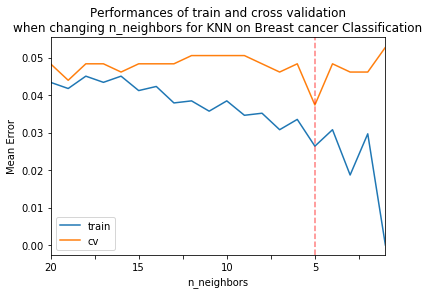

In [21]:
resKNN = gscv_KNN.cv_results_
resKNNpd = pd.DataFrame(knn_paras)
resKNNpd["train"] = 1-np.array(resKNN['mean_train_score'])
resKNNpd["cv"] =1-np.array(resKNN['mean_test_score'])

resKNNpd.n_neighbors = resKNNpd.n_neighbors.astype(str)
resKNNpd=resKNNpd.set_index(["n_neighbors"])

ax=resKNNpd.plot(title="Performances of train and cross validation\nwhen changing n_neighbors for KNN on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resKNNpd.shape[0]) if resKNNpd.index[i] == resKNNpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_KNNcb.png")

### Best value of  parameter  "n_neighbors" for KNN is 5, which is default value.

In [22]:
best_KNN = KNeighborsClassifier(n_neighbors=5)


## Let's work on SVC. I worked on hyperparameter "C" and "gamma"

In [23]:
svc=SVC(random_state=66)
svc_paras={"C":[300,100,30,10,3,1,0.3],"gamma":[1,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001]}
gscvSVM=GridSearchCV(svc, svc_paras,cv=5,n_jobs=2)
gscvSVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=66, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'C': [300, 100, 30, 10, 3, 1, 0.3], 'gamma': [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

The best classifier is:  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=66, shrinking=True,
  tol=0.001, verbose=False)


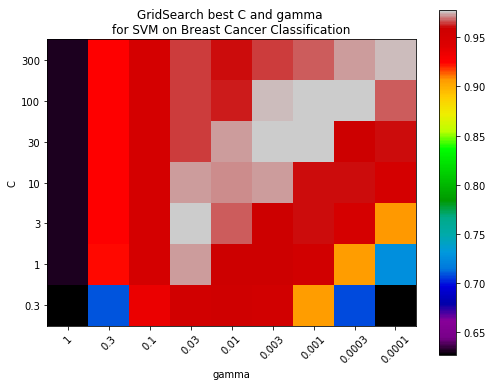

In [24]:
print("The best classifier is: ", gscvSVM.best_estimator_)


score_dict = gscvSVM.grid_scores_


scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(7,9)

title="GridSearch best C and gamma \nfor SVM on Breast Cancer Classification"
pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('gamma')
pl.ylabel('C')
pl.title(title)
pl.colorbar()
pl.xticks(np.arange(9), [1,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001], rotation=45)
pl.yticks(np.arange(7), [300,100,30,10,3,1,0.3])
pl.savefig("gridsearchSVCbc.png")

### Let's draw  validation curve only for "C" for better visulization

In [25]:
svc1=SVC(gamma=0.001,random_state=66)
svc_paras={"C":[0.3,1,3,10,30,100,300,1000]}
gscvSVM=GridSearchCV(svc1, svc_paras,cv=5,n_jobs=2)
gscvSVM.fit(X_train, y_train)
resSVM = gscvSVM.cv_results_
resSVMpd = pd.DataFrame(svc_paras)
resSVMpd["train"] = 1-np.array(resSVM['mean_train_score'])
resSVMpd["cv"] =1-np.array(resSVM['mean_test_score'])

resSVMpd.C = resSVMpd.C.astype(str)
resSVMpd=resSVMpd.set_index(["C"])

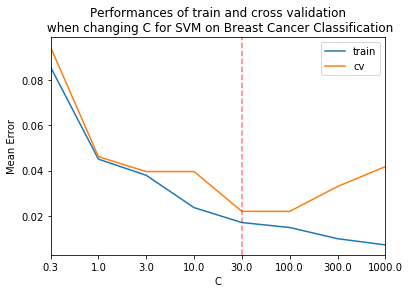

In [26]:
ax=resSVMpd.plot(title="Performances of train and cross validation\n when changing C for SVM on Breast Cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd.shape[0]) if resSVMpd.index[i] == resSVMpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMcb.png")

### Let's draw validation curve only for "gamma" for better visulization

In [27]:
svc2 = SVC(C=30,random_state=66)
svc_paras = {"gamma":[0.00001,0.00003,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]}
gscvSVM2 = GridSearchCV(svc2, svc_paras,cv=5,n_jobs=2)
gscvSVM2.fit(X_train, y_train)
resSVM2 = gscvSVM2.cv_results_
resSVMpd2 = pd.DataFrame(svc_paras)
resSVMpd2["train"] = 1-np.array(resSVM2['mean_train_score'])
resSVMpd2["cv"] =1-np.array(resSVM2['mean_test_score'])
#resSVMpd["C"]=resSVMpd["C"].apply(str)
resSVMpd2.gamma = resSVMpd2.gamma.astype(str)
resSVMpd2=resSVMpd2.set_index(["gamma"])

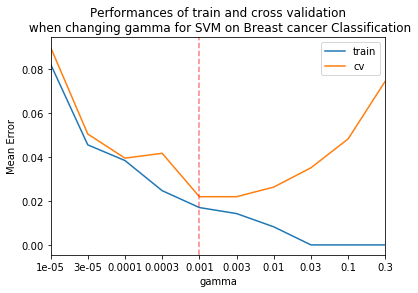

In [28]:
ax=resSVMpd2.plot(title="Performances of train and cross validation\n when changing gamma for SVM on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd2.shape[0]) if resSVMpd2.index[i] == resSVMpd2.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMcb2.png")

In [29]:
svc3 = SVC(C=30,gamma=0.001,random_state=66)
svc_paras = {"max_iter":[20,40,60,80,100,200,300,500,1000,2000,3000]}
gscvSVM2 = GridSearchCV(svc3, svc_paras,cv=5,n_jobs=2)
gscvSVM2.fit(X_train, y_train)
resSVM2 = gscvSVM2.cv_results_
resSVMpd2 = pd.DataFrame(svc_paras)
resSVMpd2["train"] = 1-np.array(resSVM2['mean_train_score'])
resSVMpd2["cv"] =1-np.array(resSVM2['mean_test_score'])
resSVMpd2.max_iter = resSVMpd2.max_iter.astype(str)
resSVMpd2=resSVMpd2.set_index(["max_iter"])

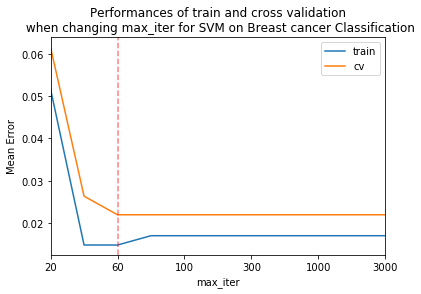

In [30]:
ax=resSVMpd2.plot(title="Performances of train and cross validation\n when changing max_iter for SVM on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd2.shape[0]) if resSVMpd2.index[i] == resSVMpd2.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMcb3.png")

### The best cross validation score from rbf kernel is shown below. 

In [31]:
gscvSVM2.best_score_

0.97802197802197799

### Let's see if we switch kernel to linear, and most critical value for linear SVM is C. 

In [32]:
svc=SVC(kernel="linear",random_state=66)
svc_paras={"C":[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30]}
gscvSVMl=GridSearchCV(svc, svc_paras,cv=5,n_jobs=2)
gscvSVMl.fit(X_train, y_train)
resSVM3 = gscvSVMl.cv_results_
resSVMpd3 = pd.DataFrame(svc_paras)
resSVMpd3["train"] = 1-np.array(resSVM3['mean_train_score'])
resSVMpd3["cv"] =1-np.array(resSVM3['mean_test_score'])
resSVMpd3.C = resSVMpd3.C.astype(str)
resSVMpd3=resSVMpd3.set_index(["C"])

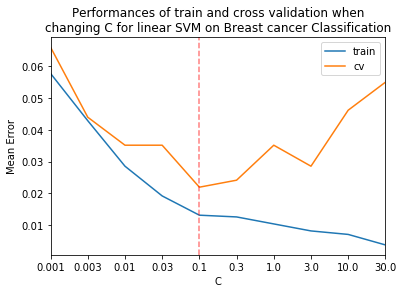

In [33]:
ax=resSVMpd3.plot(title="Performances of train and cross validation when\nchanging C for linear SVM on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resSVMpd3.shape[0]) if resSVMpd3.index[i] == resSVMpd3.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_SVMcb4.png")

In [34]:
gscvSVMl.best_score_

0.97802197802197799

### So linear kernal can achieve same performance as rbf kernal on Leaf Classification

### From above grid search, the following classifiers are the best SVC classifers working on leaf classification from above analysis, I will compare them agian in final performance section

In [35]:
best_SVC1 = SVC(C=30,gamma=0.001,max_iter=60,random_state=66)
best_SVC2 = SVC(C=0.1,kernel="linear",random_state=66)

## Next, I worked on decision tree classifier
### We can tune two parameters "max_depth" and "min_samples_sp" for pre pruning of decision tree.
### let's see the validation curves on  "max_depth" or "min_samples_split"

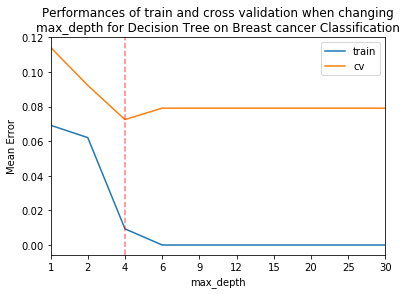

In [36]:
dtc_paras={"max_depth":[1,2,4,6,9,12,15,20,25,30]}
resTreepd = pd.DataFrame(dtc_paras)

dtc=DecisionTreeClassifier(criterion="entropy",random_state=66)
#dtc=DecisionTreeClassifier()
gscvTree=GridSearchCV(dtc, dtc_paras,cv=5,n_jobs=2)
gscvTree.fit(X_train, y_train)
resTree = gscvTree.cv_results_
resTreepd["train"] = 1-np.array(resTree['mean_train_score'])
resTreepd["cv"] = 1-np.array(resTree['mean_test_score'])

resTreepd.max_depth = resTreepd.max_depth.astype(str)
resTreepd=resTreepd.set_index(["max_depth"])
ax=resTreepd.plot(title="Performances of train and cross validation when changing\nmax_depth for Decision Tree on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resTreepd.shape[0]) if resTreepd.index[i] == resTreepd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Treecb1.png")

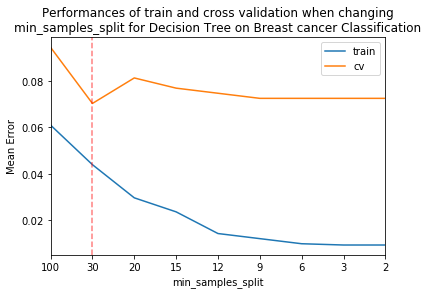

In [37]:
dtc_paras={"min_samples_split":[100,30,20,15,12,9,6,3,2]}
resTreepd = pd.DataFrame(dtc_paras)
dtc2=DecisionTreeClassifier(criterion = "entropy",max_depth=4,random_state=66)

gscvTree=GridSearchCV(dtc2, dtc_paras,cv=5,n_jobs=2)
gscvTree.fit(X_train, y_train)
resTree = gscvTree.cv_results_
resTreepd["train"] = 1-np.array(resTree['mean_train_score'])
resTreepd["cv"] = 1-np.array(resTree['mean_test_score'])
resTreepd.min_samples_split = resTreepd.min_samples_split.astype(str)
resTreepd=resTreepd.set_index(["min_samples_split"])
ax=resTreepd.plot(title="Performances of train and cross validation when changing\nmin_samples_split for Decision Tree on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resTreepd.shape[0]) if resTreepd.index[i] == resTreepd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Treecb2.png")

### The best decision tree classifier from above analysis is:

In [38]:
best_tree = DecisionTreeClassifier(criterion = "entropy",max_depth=4,min_samples_split=30,random_state=66)

## Tune parameters for boosting

### First tune learning rate

In [39]:
boost=AdaBoostClassifier(random_state=88)
boost_paras={"learning_rate":[3,2,1.5,1,0.3,0.1,0.03,0.01,0.003,0.001,0.0001]}
gscvBoost=GridSearchCV(boost, boost_paras,cv=5,n_jobs=2)
gscvBoost.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=88),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'learning_rate': [3, 2, 1.5, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

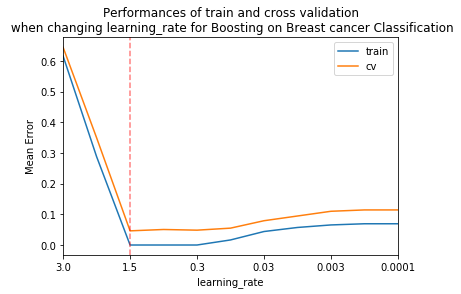

In [40]:
resBoost = gscvBoost.cv_results_
resBoostpd = pd.DataFrame(boost_paras)
resBoostpd["train"] = 1-np.array(resBoost['mean_train_score'])
resBoostpd["cv"] =1-np.array(resBoost['mean_test_score'])
resBoostpd.learning_rate = resBoostpd.learning_rate.astype(str)
resBoostpd=resBoostpd.set_index(["learning_rate"])

ax=resBoostpd.plot(title="Performances of train and cross validation\n when changing learning_rate for Boosting on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resBoostpd.shape[0]) if resBoostpd.index[i] == resBoostpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Boostbc_lr.png")

### best learning rate for AdaBoostClassifier on breast cancer dataset is 1.5

### Then tune "max_depth" for base_estimator

In [41]:
boost_Tree_Depth = pd.DataFrame({"max_depth":[1,2,3,4,7,10,13,17,20]})
boost_Tree_Depth["validation_score"] = np.zeros(len(boost_Tree_Depth["max_depth"]))

val_score = []
for depth in boost_Tree_Depth["max_depth"]:

    boost1=AdaBoostClassifier(learning_rate = 1.5,base_estimator = DecisionTreeClassifier(max_depth = depth),random_state=88)
    scores = cross_val_score(boost1,X_train,y_train,cv = 5)
    val_score.append(scores.mean())

boost_Tree_Depth["validation_score"] = np.array(val_score)

boost_Tree_Depth.max_depth = boost_Tree_Depth.max_depth.astype(str)
boost_Tree_Depth.set_index("max_depth",inplace=True)

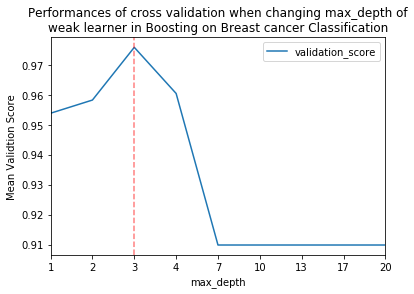

In [42]:

ax=boost_Tree_Depth.plot(title="Performances of cross validation when changing max_depth of\nweak learner in Boosting on Breast cancer Classification")
ax.set_ylabel("Mean Validtion Score")
idxmax = [i for i in range(boost_Tree_Depth.shape[0]) if boost_Tree_Depth.index[i] == boost_Tree_Depth.idxmax()['validation_score']]
ax.axvline(x=idxmax[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Boostbc_maxDepth.png")

### Best max_depth value for weak learner is 2

### Then tune "n_estimators"

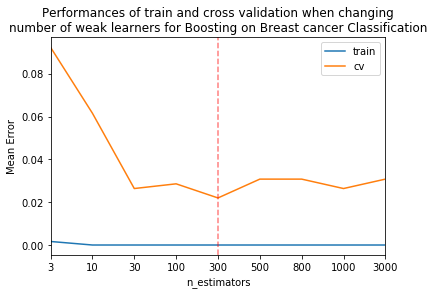

In [43]:
boost_paras={"n_estimators":[3,10,30,100,300,500,800,1000,3000]}
resBoostpd = pd.DataFrame(boost_paras)
resBoostpd["train"] = resBoostpd["cv"] = np.zeros(len(boost_paras["n_estimators"]))

boost2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=1.5,random_state=88)
gscvBoost2 = GridSearchCV(boost2,boost_paras,cv=5,n_jobs=2)
gscvBoost2.fit(X_train, y_train)
resBoost = gscvBoost2.cv_results_
resBoostpd["train"] = 1-np.array(resBoost['mean_train_score'])
resBoostpd["cv"] = 1-np.array(resBoost['mean_test_score'])

resBoostpd.n_estimators = resBoostpd.n_estimators.astype(str)
resBoostpd = resBoostpd.set_index(["n_estimators"])
ax=resBoostpd.plot(title="Performances of train and cross validation when changing\nnumber of weak learners for Boosting on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resBoostpd.shape[0]) if resBoostpd.index[i] == resBoostpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_Boostbc_ne.png")

### From above analysis, the best AdaBoostClassifier on breast cancer dataset is:

In [44]:
best_boost = AdaBoostClassifier(n_estimators=300,base_estimator=DecisionTreeClassifier(max_depth=3),learning_rate=1.5,random_state=88)

## Next, I worked on neural network
### let's find best option for number of nodes in each layer and number of layers

In [45]:
mlp0 = MLPClassifier(solver = "sgd",random_state=10)
mlp_paras={"hidden_layer_sizes":[(i*10,j) for i in range(1,11) for j in [1,2,3,5,7,9,11,13,15,17,20]]}
gscvMLP0=GridSearchCV(mlp0, mlp_paras,cv=5,n_jobs=2)
gscvMLP0.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(10, 1), (10, 2), (10, 3), (10, 5), (10, 7), (10, 9), (10, 11), (10, 13), (10, 15), (10, 17), (10, 20), (20, 1), (20, 2), (20, 3), (20, 5), (20, 7), (20, 9), (20, 11), (20, 13), (20, 15), (20, 17), (20, 20), (30, 1), (30, 2), (30, 3), (30, 5), (30, 7), (30, 9), (30... 2), (100, 3), (100, 5), (100, 7), (100, 9), (100, 11), (100, 13), (100, 15), (100, 17), (100, 20)]},
       pre_dispatch='2*n_jobs', refit=True, return_trai

The best classifier is:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


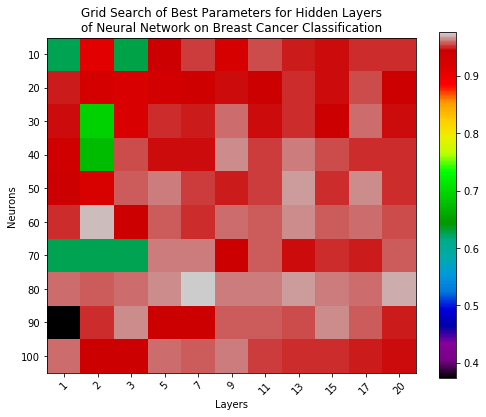

In [46]:
print("The best classifier is: ", gscvMLP0.best_estimator_)


score_dict = gscvMLP0.grid_scores_


scores = [x[1] for x in score_dict]
scores = np.array(scores).reshape(10,11)


pl.figure(figsize=(8, 6))
pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
pl.xlabel('Layers')
pl.ylabel('Neurons')
pl.colorbar()
pl.xticks(np.arange(11), [1,2,3,5,7,9,11,13,15,17,20], rotation=45)
pl.yticks(np.arange(10), [i*10 for i in range(1,11)])
pl.title("Grid Search of Best Parameters for Hidden Layers\nof Neural Network on Breast Cancer Classification")
pl.savefig("MLPcb_hs.png")

### Let's draw validation curve only for "layers" for better visulization

In [47]:
mlp0 = MLPClassifier(solver = "sgd",random_state=10)
mlp_paras={"hidden_layer_sizes":[(80,j) for j in [1,2,3,5,7,9,11,13,15,17,20]]}
gscvMLP0=GridSearchCV(mlp0, mlp_paras,cv=5,n_jobs=2)
gscvMLP0.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(80, 1), (80, 2), (80, 3), (80, 5), (80, 7), (80, 9), (80, 11), (80, 13), (80, 15), (80, 17), (80, 20)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

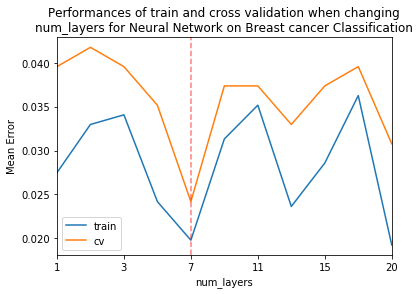

In [48]:
resMLP = gscvMLP0.cv_results_
resMLPpd = pd.DataFrame({"num_layers":[1,2,3,5,7,9,11,13,15,17,20]})
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.num_layers = resMLPpd.num_layers.astype(str)
resMLPpd=resMLPpd.set_index(["num_layers"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nnum_layers for Neural Network on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPcb_layers.png")

### Let's draw validation curve only for "num_neurons" for better visulization

In [49]:
mlp0 = MLPClassifier(solver = "sgd",random_state=10)
mlp_paras={"hidden_layer_sizes":[(i*10,7) for i in range(1,11)]}
gscvMLP0=GridSearchCV(mlp0, mlp_paras,cv=5,n_jobs=2)
gscvMLP0.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(10, 7), (20, 7), (30, 7), (40, 7), (50, 7), (60, 7), (70, 7), (80, 7), (90, 7), (100, 7)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

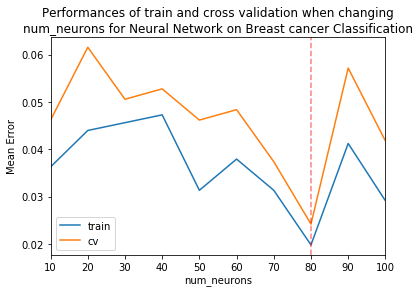

In [50]:
resMLP = gscvMLP0.cv_results_
resMLPpd = pd.DataFrame({"num_neurons":[i*10 for i in range(1,11)]})
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.num_neurons = resMLPpd.num_neurons.astype(str)
resMLPpd=resMLPpd.set_index(["num_neurons"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nnum_neurons for Neural Network on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPcb_num_neurons.png")

### I selected hidden_layer_sizes=(80, 7) to continue the analysis
### Let's tune learning_rate_init

In [51]:
mlp = MLPClassifier(solver = "sgd",hidden_layer_sizes=[80,7],random_state=10)
mlp_paras = {"learning_rate_init":[30,10,3,1,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001]}
gscvMLP=GridSearchCV(mlp, mlp_paras,cv=5,n_jobs=2)
gscvMLP.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[80, 7], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'learning_rate_init': [30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

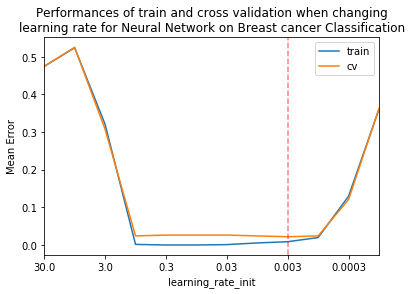

In [52]:
resMLP = gscvMLP.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.learning_rate_init = resMLPpd.learning_rate_init.astype(str)
resMLPpd=resMLPpd.set_index(["learning_rate_init"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nlearning rate for Neural Network on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPcb_lr.png")

### From above analysis, we'd better use learning rate between 1 to 0.001. Here 0.003 has best performance. 

### Then I build cross validation curve for parameter "alpha" which is for regularization

In [53]:
mlp1=MLPClassifier(solver = "sgd",hidden_layer_sizes=[80,7],learning_rate_init=0.003,random_state=10)
mlp_paras={"alpha":[30,10,3,1,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001,0.00003,0.00001]}
gscvMLP1=GridSearchCV(mlp1, mlp_paras,cv=5,n_jobs=2)
gscvMLP1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[80, 7], learning_rate='constant',
       learning_rate_init=0.003, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'alpha': [30, 10, 3, 1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003, 0.0001, 3e-05, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

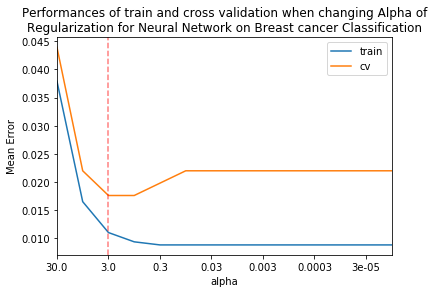

In [54]:
resMLP = gscvMLP1.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.alpha = resMLPpd.alpha.astype(str)
resMLPpd=resMLPpd.set_index(["alpha"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing Alpha of\nRegularization for Neural Network on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPcb_alpha.png")

### From above analysis, I chose 3.0 as best alpha I can pick.

### Then let's tune momentum

In [55]:
mlp2=MLPClassifier(solver = "sgd",hidden_layer_sizes=[80,7],learning_rate_init=0.003,random_state=10,alpha=3)
mlp_paras={"momentum":[0.99,0.97,0.95,0.93,0.92,0.91,0.9,0.89,0.88,0.85,0.8,0.7]}
gscvMLP2=GridSearchCV(mlp2, mlp_paras,cv=5,n_jobs=2)
gscvMLP2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=3, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[80, 7], learning_rate='constant',
       learning_rate_init=0.003, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'momentum': [0.99, 0.97, 0.95, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.85, 0.8, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

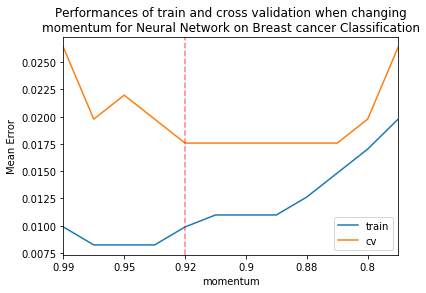

In [56]:
resMLP = gscvMLP2.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.momentum = resMLPpd.momentum.astype(str)
resMLPpd=resMLPpd.set_index(["momentum"])

ax=resMLPpd.plot(title="Performances of train and cross validation when changing\nmomentum for Neural Network on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPcb_momentum.png")

### The best momentum value I can pick is 0.92

### Then I try to tune max_iter

In [57]:
mlp3=MLPClassifier(solver = "sgd",hidden_layer_sizes=[80,7],
                   learning_rate_init=0.003,random_state=10,
                   alpha=3,momentum = 0.92)
mlp_paras={"max_iter":[10*i for i in range(5,26)]}
gscvMLP3=GridSearchCV(mlp3, mlp_paras,cv=5,n_jobs=2)
gscvMLP3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=3, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[80, 7], learning_rate='constant',
       learning_rate_init=0.003, max_iter=200, momentum=0.92,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'max_iter': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

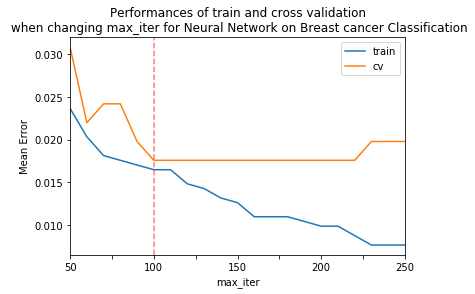

In [58]:
resMLP = gscvMLP3.cv_results_
resMLPpd = pd.DataFrame(mlp_paras)
resMLPpd["train"] = 1-np.array(resMLP['mean_train_score'])
resMLPpd["cv"] =1-np.array(resMLP['mean_test_score'])
resMLPpd.max_iter = resMLPpd.max_iter.astype(str)
resMLPpd=resMLPpd.set_index(["max_iter"])

ax=resMLPpd.plot(title="Performances of train and cross validation\n when changing max_iter for Neural Network on Breast cancer Classification")
ax.set_ylabel("Mean Error")
idxmin = [i for i in range(resMLPpd.shape[0]) if resMLPpd.index[i] == resMLPpd.idxmin()['cv']]
ax.axvline(x=idxmin[0],color='r',ls='--',alpha=0.5)
plt.savefig("complex-error_MLPcb_miter.png")

### from above analysis, best  MLPClassifier indentified is :

In [59]:
best_mlp = MLPClassifier(solver = "sgd",hidden_layer_sizes=[80,7],
                   learning_rate_init=0.003,random_state=10,
                   alpha=3,momentum = 0.92,max_iter=100)

## The following are my best classifiers obtained from parameter optimization by cross validation

In [60]:
best_classifiers = [
    best_KNN, #KNN
    best_SVC1,#SVM with rbf kernel
    best_SVC2,#SVM with linear kernel
    best_mlp,#ANN
    best_tree,#Decision Tree
    best_boost,#Boosting
    ]

In [61]:
log_cols=["Classifier", "Train_Accuracy","Test_Accuracy", "Training_time", "Prediction_time_on_test"]
final_performance = pd.DataFrame(columns = log_cols)
repeat = 20

for clf in best_classifiers:
    name = clf.__class__.__name__
    print("="*30)
    if name  == "SVC":
        name += clf.kernel
    print(name)
    
    train_acc = []
    test_acc = []
    training_time = []
    prediction_time_on_test  = []
    
    for _ in range(repeat):
        
        start1 = time.time()
        clf.fit(X_train, y_train)
        training_time.append(time.time() - start1)
        
        train_predictions = clf.predict(X_train)
        train_acc.append(accuracy_score(y_train, train_predictions))

        start2 = time.time()
        test_predictions = clf.predict(X_test)
        prediction_time_on_test.append(time.time() - start2)
        
        test_acc.append(accuracy_score(y_test, test_predictions))


    log_entry = pd.DataFrame([[name, np.mean(train_acc)*100, np.mean(test_acc)*100, np.mean(training_time), np.mean(prediction_time_on_test)]], columns=log_cols)
    final_performance = final_performance.append(log_entry)
final_performance = final_performance.reset_index(drop=True)
print("="*30)

KNeighborsClassifier
SVCrbf
SVClinear
MLPClassifier
DecisionTreeClassifier
AdaBoostClassifier


In [62]:
final_performance

,Classifier,Train_Accuracy,Test_Accuracy,Training_time,Prediction_time_on_test
0,KNeighborsClassifier,97.362637,98.245614,0.002544,0.002446
1,SVCrbf,98.461538,97.368421,0.003907,0.000000
2,SVClinear,98.241758,96.491228,0.003125,0.000050
3,MLPClassifier,98.461538,98.245614,0.289237,0.000781
4,DecisionTreeClassifier,96.263736,91.228070,0.008594,0.000000
5,AdaBoostClassifier,100.000000,96.491228,1.145403,0.036184


### The first SVC is for rbf kernel, and the second is for linear. Linear SVC was trained faster than rbf.

## Plot Learning Curves

In [63]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error rate")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_error = 1-train_scores
    test_error = 1-test_scores
    train_error_mean = np.mean(train_error, axis=1)
    train_error_std = np.std(train_error, axis=1)
    test_error_mean = np.mean(test_error, axis=1)
    test_error_std = np.std(test_error, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_error_mean - train_error_std,
                     train_error_mean + train_error_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_error_mean - test_error_std,
                     test_error_mean + test_error_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_error_mean, 'o-', color="r",
             label="Training error rate")
    plt.plot(train_sizes, test_error_mean, 'o-', color="g",
             label="Cross-validation error rate")

    plt.legend(loc="best")
    return plt

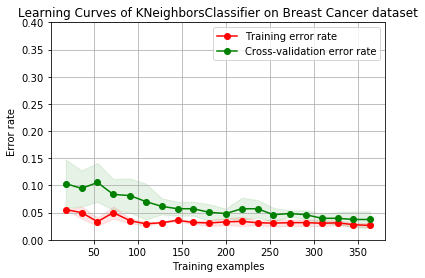

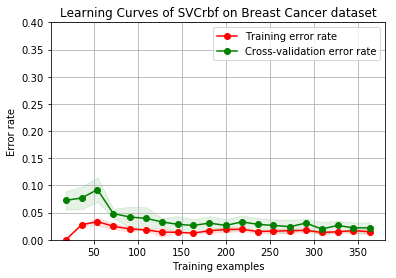

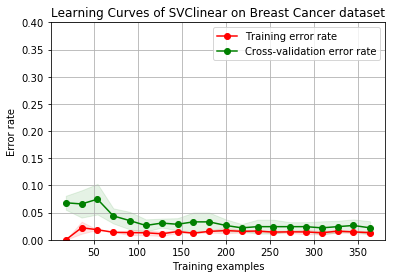

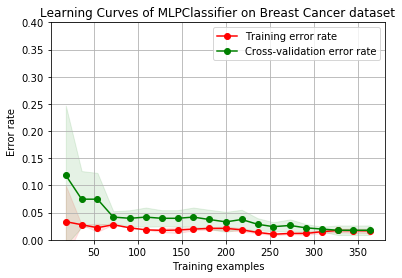

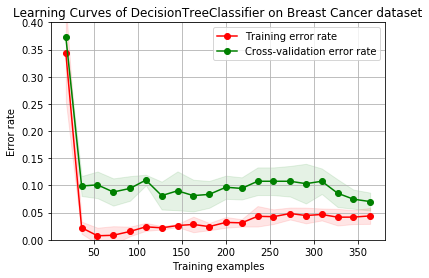

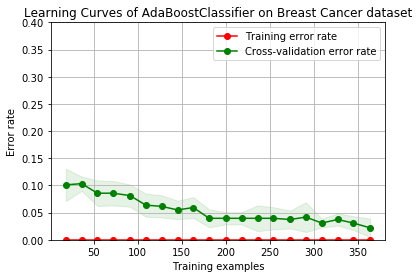

In [68]:
for clf in best_classifiers:
    name = clf.__class__.__name__
    if name  == "SVC":
        name += clf.kernel
    title = "Learning Curves of {} on Breast Cancer dataset".format(name)

    plot_learning_curve(clf, title, X_train, y_train, ylim=(0, 0.4),train_sizes=np.linspace(.05, 1.0, 20), cv=5, n_jobs=4)
    pic_name = "learning_curve_bc_{}.png".format(name)
    plt.savefig(pic_name)
plt.show()